<a id='section1'></a>

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns #for plotting
from sklearn.ensemble import RandomForestClassifier #for the model
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz #plot tree
from sklearn.metrics import roc_curve, auc #for model evaluation
from sklearn.metrics import classification_report #for model evaluation
from sklearn.metrics import confusion_matrix #for model evaluation
from sklearn.model_selection import train_test_split #for data splitting
import eli5 #for purmutation importance
from eli5.sklearn import PermutationImportance
import shap #for SHAP values
np.random.seed(123) #ensure reproducibility

pd.options.mode.chained_assignment = None  #hide any pandas warnings

ModuleNotFoundError: No module named 'shap'

<a id='section2'></a>

# Load the data

Next, load the data,

In [ ]:
df = pd.read_csv("heart disease classification dataset.csv")
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes


In [ ]:
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,male,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,yes
1,37,male,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,yes
2,41,female,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,yes
3,56,male,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,yes
4,57,female,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,yes
5,57,male,0,140.0,192.0,0,1,148.0,0,0.4,1,0,1,yes
6,56,female,1,140.0,294.0,0,0,153.0,0,1.3,1,0,2,yes
7,44,male,1,120.0,263.0,0,1,173.0,0,0.0,2,0,3,yes
8,52,male,2,172.0,199.0,1,1,162.0,0,0.5,2,0,3,yes
9,57,male,2,150.0,168.0,0,1,174.0,0,1.6,2,0,2,yes



- **age**: The person's age in years
- **sex**: The person's sex (1 = male, 0 = female)
- **cp:** The chest pain experienced (Value 1: typical angina, Value 2: atypical angina, Value 3: non-anginal pain, Value 4: asymptomatic)
- **trestbps:** The person's resting blood pressure (mm Hg on admission to the hospital)
- **chol:** The person's cholesterol measurement in mg/dl
- **fbs:** The person's fasting blood sugar (> 120 mg/dl, 1 = true; 0 = false) 
- **restecg:** Resting electrocardiographic measurement (0 = normal, 1 = having ST-T wave abnormality, 2 = showing probable or definite left ventricular hypertrophy by Estes' criteria)
- **thalach:** The person's maximum heart rate achieved
- **exang:** Exercise induced angina (1 = yes; 0 = no)
- **oldpeak:** ST depression induced by exercise relative to rest ('ST' relates to positions on the ECG plot. 
- **slope:** the slope of the peak exercise ST segment (Value 1: upsloping, Value 2: flat, Value 3: downsloping)
- **ca:** The number of major vessels (0-3)
- **thal:** A blood disorder called thalassemia (3 = normal; 6 = fixed defect; 7 = reversable defect)
- **target:** Heart disease (0 = no, 1 = yes)

# Cleaning the dataset

In [ ]:
# Change "sex" column to 1(=male) or 0(=female)
df["sex"] = df["sex"].map({"male": 1, "female": 0})

# Change "target" column to 1(=yes) or 0(=no) (have heart disease or not)
df["target"] = df["target"].map({"yes": 1, "no": 0})

In [ ]:
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145.0,233.0,1,0,150.0,0,2.3,0,0,1,1
1,37,1,2,130.0,250.0,0,1,187.0,0,3.5,0,0,2,1
2,41,0,1,130.0,204.0,0,0,172.0,0,1.4,2,0,2,1
3,56,1,1,120.0,236.0,0,1,178.0,0,0.8,2,0,2,1
4,57,0,0,NaN,354.0,0,1,163.0,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140.0,241.0,0,1,123.0,1,0.2,1,0,3,0
299,45,1,3,110.0,264.0,0,1,132.0,0,1.2,1,0,3,0
300,68,1,0,144.0,193.0,1,1,141.0,0,3.4,1,2,3,0
301,57,1,0,NaN,131.0,0,1,115.0,1,1.2,1,1,3,0


Check the data types,

In [ ]:
dt.dtypes

Age                 int64
Sex               float64
ChestPainType     float64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG        float64
MaxHR               int64
ExerciseAngina    float64
Oldpeak           float64
ST_Slope          float64
HeartDisease        int64
dtype: object

In [ ]:
# Check missing value
df.isna().sum()

age         0
sex         0
cp          0
trestbps    4
chol        1
fbs         0
restecg     0
thalach     5
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
# Drop missing value
df.dropna(subset=["trestbps", "chol", "thalach"], axis=0, inplace=True)
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [ ]:
df.info() 
# Total have 293 rows, 14 columns

<class 'pandas.core.frame.DataFrame'>
Int64Index: 293 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       293 non-null    int64  
 1   sex       293 non-null    int64  
 2   cp        293 non-null    int64  
 3   trestbps  293 non-null    float64
 4   chol      293 non-null    float64
 5   fbs       293 non-null    int64  
 6   restecg   293 non-null    int64  
 7   thalach   293 non-null    float64
 8   exang     293 non-null    int64  
 9   oldpeak   293 non-null    float64
 10  slope     293 non-null    int64  
 11  ca        293 non-null    int64  
 12  thal      293 non-null    int64  
 13  target    293 non-null    int64  
dtypes: float64(4), int64(10)
memory usage: 34.3 KB


# Exploratory Data Analysis

In [ ]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000,293.000000
mean,54.348123,0.689420,0.965870,131.679181,246.177474,0.146758,0.518771,149.880546,0.331058,1.054266,1.392491,0.730375,2.320819,0.546075
std,9.182042,0.463523,1.033114,17.658077,51.405545,0.354470,0.527162,22.638525,0.471399,1.173169,0.618946,1.029862,0.613331,0.498724
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.000000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,134.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.000000,0.000000,1.000000,167.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [ ]:
# Find out how many of each class there
df["target"].value_counts()

1    160
0    133
Name: target, dtype: int64

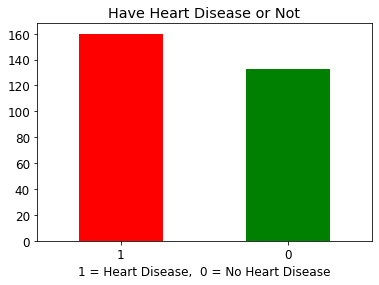

In [ ]:
df["target"].value_counts().plot(kind="bar", color=["red", "green"])
plt.title("Have Heart Disease or Not")
plt.xlabel("1 = Heart Disease,  0 = No Heart Disease" )
plt.xticks(rotation=0);

In [ ]:
df.drop('target', axis=1).corrwith(df.target).hvplot.barh(
    width=600, height=400, 
    title="Correlation between Heart Disease and Numeric Features", 
    ylabel='Correlation', xlabel='Numerical Features',)

:Bars   [index]   (0)

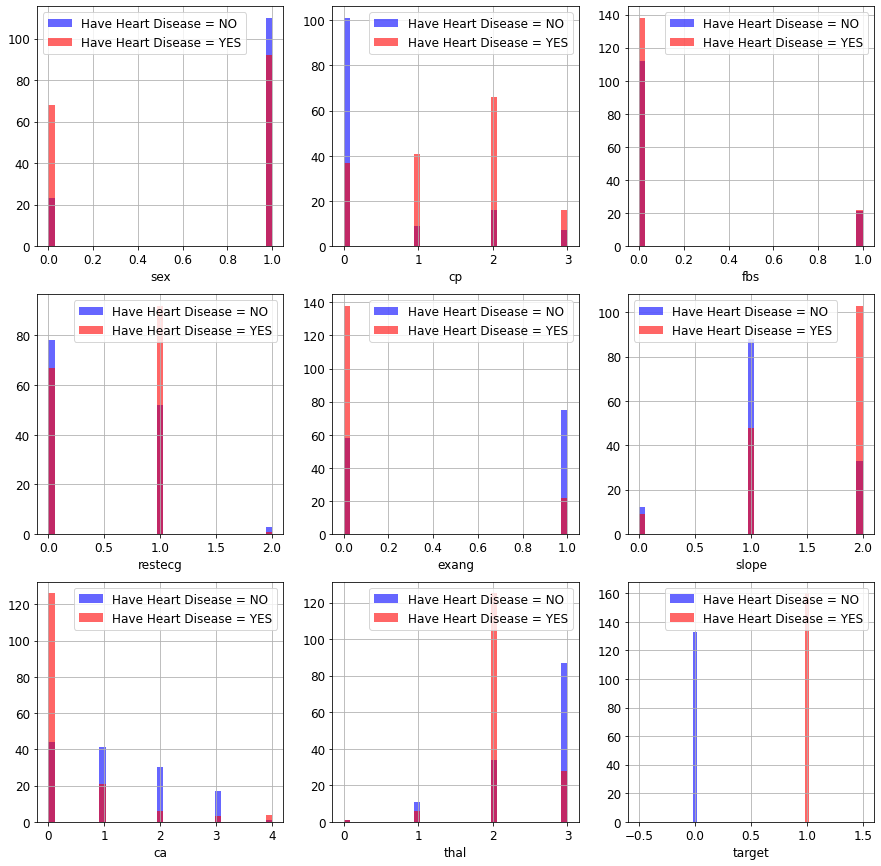

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(categorical_val, 1):
    plt.subplot(3, 3, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

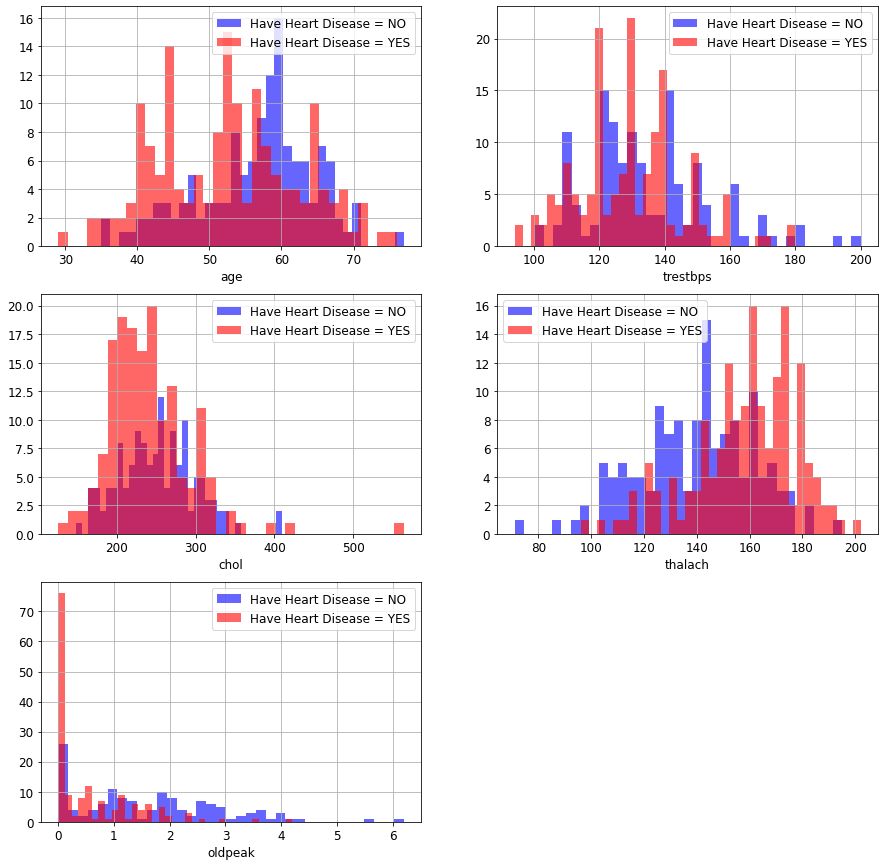

In [ ]:
plt.figure(figsize=(15, 15))

for i, column in enumerate(continous_val, 1):
    plt.subplot(3, 2, i)
    df[df["target"] == 0][column].hist(bins=35, color='blue', label='Have Heart Disease = NO', alpha=0.6)
    df[df["target"] == 1][column].hist(bins=35, color='red', label='Have Heart Disease = YES', alpha=0.6)
    plt.legend()
    plt.xlabel(column)

In [ ]:
# Heart disease frequency according to sex
pd.crosstab(df.target, df.sex)

sex,0,1
target,,
0,23,110
1,68,92


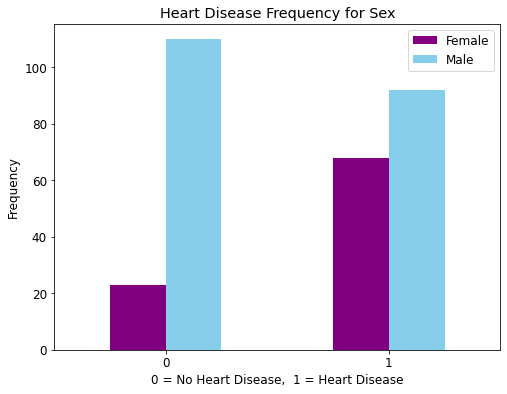

In [ ]:
# Visualize heart disease frequency according to sex
pd.crosstab(df.target, df.sex).plot(kind="bar", figsize=(8,6), color=["purple", "skyblue"])
plt.title("Heart Disease Frequency for Sex")
plt.xlabel("0 = No Heart Disease,  1 = Heart Disease" )
plt.ylabel("Frequency")
plt.legend(["Female", "Male"]);
plt.xticks(rotation=0);

(14.5, -0.5)

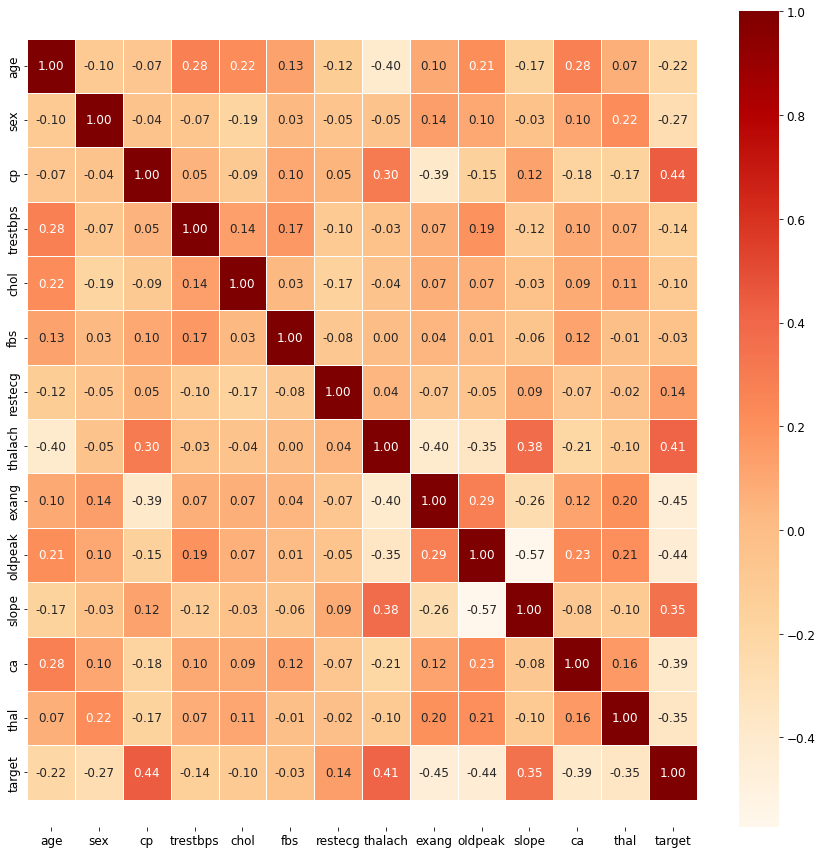

In [ ]:
# Make a correlation matrix
corr_matrix = df.corr()
fig, ax = plt.subplots(figsize=(15, 15))
ax = sns.heatmap(corr_matrix, 
                 annot=True,
                 linewidths=0.5,
                 fmt=".2f",
                 cmap="OrRd");
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)

The matrix indicates that 'cp'(chest pain type) and 'thalach'(maximum heart rate achieved) features have a higher correlation coefficient with target variable. Let's dive deepers

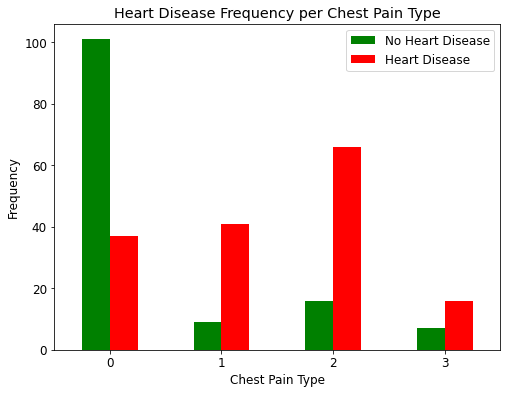

In [ ]:
# Heart Disease Frequency per Chest Pain Type
pd.crosstab(df.cp, df.target).plot(kind="bar", figsize=(8,6), color=["green", "red"])
plt.title("Heart Disease Frequency per Chest Pain Type")
plt.xlabel("Chest Pain Type")
plt.ylabel("Frequency")
plt.legend(["No Heart Disease", "Heart Disease"])
plt.xticks(rotation=0);

Chest Pain Type
0: Typical angina: chest pain related decrease blood supply to the heart
1: Atypical angina: chest pain not related to heart
2: Non-anginal pain: typically esophageal spasms (non-heart related)
3: Asymptomatic: chest pain not showing signs of disease

In [ ]:
have_disease = df.loc[df['target']==1, 'cp'].value_counts().hvplot.bar(alpha=0.4) 
no_disease = df.loc[df['target']==0, 'cp'].value_counts().hvplot.bar(alpha=0.4) 

(no_disease * have_disease).opts(
    title="Heart Disease by Chest Pain Type", xlabel='Chest Pain Type', ylabel='Count',
    width=500, height=450, legend_cols=2, legend_position='top_right'
)

:Overlay
   .Bars.Cp.I  :Bars   [index]   (cp)
   .Bars.Cp.II :Bars   [index]   (cp)

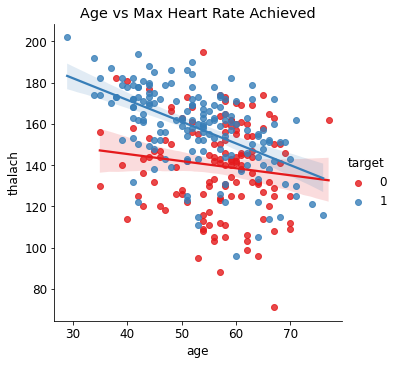

In [ ]:
#visualize age vs thalach
sns.lmplot(data = df, x = 'age', y = 'thalach', hue = 'target', palette = 'Set1')
plt.title("Age vs Max Heart Rate Achieved")
plt.show()

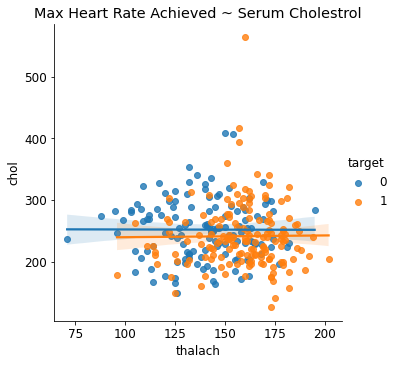

In [ ]:
#visualize thalach vs chol
sns.lmplot(data = df, x = 'thalach', y = 'chol', hue = 'target')
plt.title("Max Heart Rate Achieved ~ Serum Cholestrol")
plt.show()

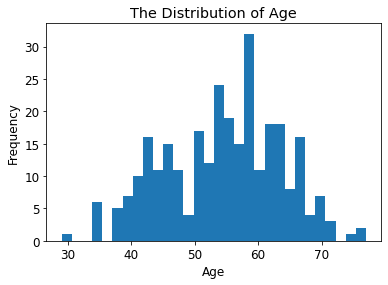

In [ ]:
# Check the distribution of the "age" column
df.age.plot.hist(bins=30)
plt.title("The Distribution of Age")
plt.xlabel("Age");

# Picking the Best Fitting Model

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

def print_score(clf, X_train, y_train, X_test, y_test, train=True):
    if train:
        pred = clf.predict(X_train)
        clf_report = pd.DataFrame(classification_report(y_train, pred, output_dict=True))
        print("Train Result:\n================================================")
        print(f"Accuracy Score: {accuracy_score(y_train, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_train, pred)}\n")
        
    elif train==False:
        pred = clf.predict(X_test)
        clf_report = pd.DataFrame(classification_report(y_test, pred, output_dict=True))
        print("Test Result:\n================================================")        
        print(f"Accuracy Score: {accuracy_score(y_test, pred) * 100:.2f}%")
        print("_______________________________________________")
        print(f"CLASSIFICATION REPORT:\n{clf_report}")
        print("_______________________________________________")
        print(f"Confusion Matrix: \n {confusion_matrix(y_test, pred)}\n")

In [ ]:
from sklearn.model_selection import train_test_split

X = df.drop('target', axis=1)
y = df.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

1. Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_clf = LogisticRegression(solver='liblinear')
lr_clf.fit(X_train, y_train)

print_score(lr_clf, X_train, y_train, X_test, y_test, train=True)
print_score(lr_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 85.37%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.880435    0.831858  0.853659    0.856147      0.855554
recall       0.810000    0.895238  0.853659    0.852619      0.853659
f1-score     0.843750    0.862385  0.853659    0.853068      0.853295
support    100.000000  105.000000  0.853659  205.000000    205.000000
_______________________________________________
Confusion Matrix: 
 [[81 19]
 [11 94]]

Test Result:
Accuracy Score: 84.09%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.880000   0.825397  0.840909   0.852698      0.845873
recall      0.666667   0.945455  0.840909   0.806061      0.840909
f1-score    0.758621   0.881356  0.840909   0.819988      0.835330
support    33.000000  55.000000  0.840909  88.000000     88.000000
____________

In [ ]:
test_score = accuracy_score(y_test, lr_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, lr_clf.predict(X_train)) * 100

results_df = pd.DataFrame(data=[["Logistic Regression", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df

,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.365854,84.090909


2. K-Nearest Neighbors Claasifer

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)

print_score(knn_clf, X_train, y_train, X_test, y_test, train=True)
print_score(knn_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 75.12%
_______________________________________________
CLASSIFICATION REPORT:
                    0           1  accuracy   macro avg  weighted avg
precision    0.757895    0.745455   0.75122    0.751675      0.751523
recall       0.720000    0.780952   0.75122    0.750476      0.751220
f1-score     0.738462    0.762791   0.75122    0.750626      0.750923
support    100.000000  105.000000   0.75122  205.000000    205.000000
_______________________________________________
Confusion Matrix: 
 [[72 28]
 [23 82]]

Test Result:
Accuracy Score: 64.77%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.531250   0.714286  0.647727   0.622768      0.645647
recall      0.515152   0.727273  0.647727   0.621212      0.647727
f1-score    0.523077   0.720721  0.647727   0.621899      0.646604
support    33.000000  55.000000  0.647727  88.000000     88.000000
____________

In [ ]:
test_score = accuracy_score(y_test, knn_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, knn_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["K-nearest neighbors", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.365854,84.090909
1,K-nearest neighbors,75.121951,64.772727


3. Support Vector Machine

In [ ]:
from sklearn.svm import SVC


svm_clf = SVC(kernel='rbf', gamma=0.1, C=1.0)
svm_clf.fit(X_train, y_train)

print_score(svm_clf, X_train, y_train, X_test, y_test, train=True)
print_score(svm_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    100.0  105.0       1.0      205.0         205.0
_______________________________________________
Confusion Matrix: 
 [[100   0]
 [  0 105]]

Test Result:
Accuracy Score: 62.50%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.500000   0.627907     0.625   0.563953      0.579942
recall      0.030303   0.981818     0.625   0.506061      0.625000
f1-score    0.057143   0.765957     0.625   0.411550      0.500152
support    33.000000  55.000000     0.625  88.000000     88.000000
_______________________________________________
Confusion Matr

In [ ]:
test_score = accuracy_score(y_test, svm_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, svm_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Support Vector Machine", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.365854,84.090909
1,K-nearest neighbors,75.121951,64.772727
2,Support Vector Machine,100.000000,62.500000


4. Decision Tres Classifer

In [ ]:
from sklearn.tree import DecisionTreeClassifier


tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

print_score(tree_clf, X_train, y_train, X_test, y_test, train=True)
print_score(tree_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    100.0  105.0       1.0      205.0         205.0
_______________________________________________
Confusion Matrix: 
 [[100   0]
 [  0 105]]

Test Result:
Accuracy Score: 80.68%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.735294   0.851852  0.806818   0.793573      0.808143
recall      0.757576   0.836364  0.806818   0.796970      0.806818
f1-score    0.746269   0.844037  0.806818   0.795153      0.807374
support    33.000000  55.000000  0.806818  88.000000     88.000000
_______________________________________________
Confusion Matr

In [ ]:
test_score = accuracy_score(y_test, tree_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, tree_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Decision Tree Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.365854,84.090909
1,K-nearest neighbors,75.121951,64.772727
2,Support Vector Machine,100.000000,62.500000
3,Decision Tree Classifier,100.000000,80.681818


5. Random Forest Classifer

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

rf_clf = RandomForestClassifier(n_estimators=1000, random_state=42)
rf_clf.fit(X_train, y_train)

print_score(rf_clf, X_train, y_train, X_test, y_test, train=True)
print_score(rf_clf, X_train, y_train, X_test, y_test, train=False)

Train Result:
Accuracy Score: 100.00%
_______________________________________________
CLASSIFICATION REPORT:
               0      1  accuracy  macro avg  weighted avg
precision    1.0    1.0       1.0        1.0           1.0
recall       1.0    1.0       1.0        1.0           1.0
f1-score     1.0    1.0       1.0        1.0           1.0
support    100.0  105.0       1.0      205.0         205.0
_______________________________________________
Confusion Matrix: 
 [[100   0]
 [  0 105]]

Test Result:
Accuracy Score: 86.36%
_______________________________________________
CLASSIFICATION REPORT:
                   0          1  accuracy  macro avg  weighted avg
precision   0.956522   0.830769  0.863636   0.893645      0.877926
recall      0.666667   0.981818  0.863636   0.824242      0.863636
f1-score    0.785714   0.900000  0.863636   0.842857      0.857143
support    33.000000  55.000000  0.863636  88.000000     88.000000
_______________________________________________
Confusion Matr

In [ ]:
test_score = accuracy_score(y_test, rf_clf.predict(X_test)) * 100
train_score = accuracy_score(y_train, rf_clf.predict(X_train)) * 100

results_df_2 = pd.DataFrame(data=[["Random Forest Classifier", train_score, test_score]], 
                          columns=['Model', 'Training Accuracy %', 'Testing Accuracy %'])
results_df = results_df.append(results_df_2, ignore_index=True)
results_df

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.


,Model,Training Accuracy %,Testing Accuracy %
0,Logistic Regression,85.365854,84.090909
1,K-nearest neighbors,75.121951,64.772727
2,Support Vector Machine,100.000000,62.500000
3,Decision Tree Classifier,100.000000,80.681818
4,Random Forest Classifier,100.000000,86.363636


# Anaylsis of Random Forest Classifer

We can plot the consequent decision tree, to see what it's doing,

In [ ]:
#The first step is simply to train a random forest and extract one tree (we could also train a single decision tree).
model = RandomForestClassifier(max_depth = 3, n_estimators=10)
model.fit(X_train, y_train)
estimator_limited = model.estimators_[5]
estimator_limited

DecisionTreeClassifier(max_depth=3, max_features='auto', random_state=941243409)

In [ ]:
#We take the trained tree and export it as a .dot file using export_graphviz.
from sklearn.tree import export_graphviz

export_graphviz(estimator_limited, out_file='tree_limited.dot', feature_names = X_train.columns,
                class_names = ['disease', 'no disease'],
                rounded = True, proportion = False, precision = 2, filled = True)

In [ ]:
#Next we use a system command to convert dot file to png.
!dot -Tpng tree_limited.dot -o tree_limited.png

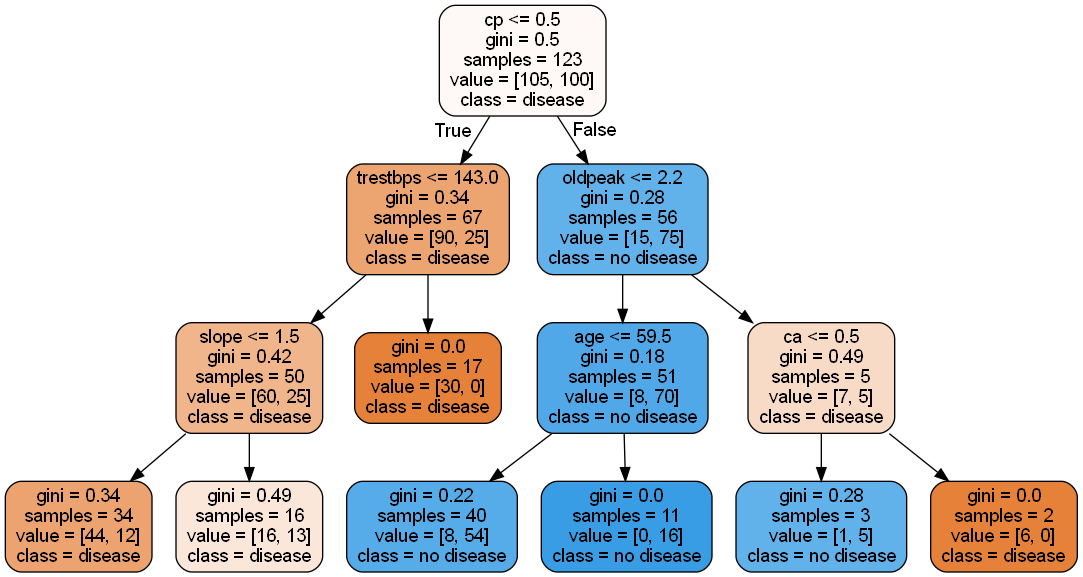

In [ ]:
# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree_limited.png')

This gives us on explainability tool. However, I can't glance at this and get a quick sense of the most important features. We'll revisit those later. Next, let's evaluate the model,

In [ ]:
y_predict = model.predict(X_test)
y_pred_quant = model.predict_proba(X_test)[:, 1]
y_pred_bin = model.predict(X_test)

Assess the fit with a confusion matrix,

[[22 11]
 [ 5 50]]


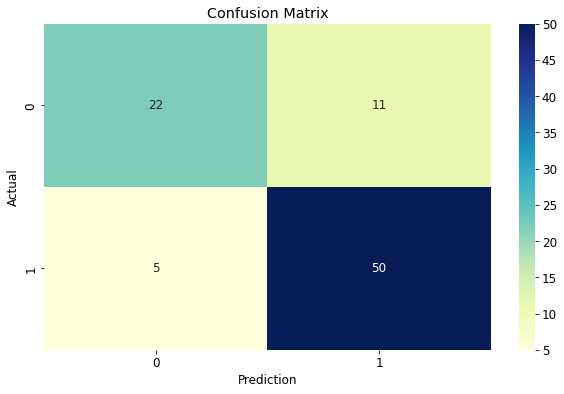

In [ ]:
confusion_matrix = confusion_matrix(y_test, y_pred_bin)
print(confusion_matrix)

#heatmap matrix
plt.figure(figsize = (10,6))
sns.heatmap(confusion_matrix, annot = True, cmap = 'YlGnBu')
plt.title("Confusion Matrix")
plt.xlabel("Prediction")
plt.ylabel("Actual")
plt.show()

Diagnostic tests are often sold, marketed, cited and used with **sensitivity** and **specificity** as the headline metrics. Sensitivity and specificity are defined as,

\begin{align}
Sensitivity = \frac{True\:Positives}{True\:Positives + False\:Negatives}
\end{align}

\begin{align}
Specificity = \frac{True\:Negatives}{True\:Negatives + False\:Positives}
\end{align}

In [ ]:
total=sum(sum(confusion_matrix))

sensitivity = confusion_matrix[0,0]/(confusion_matrix[0,0]+confusion_matrix[1,0])
print('Sensitivity : ', sensitivity )

specificity = confusion_matrix[1,1]/(confusion_matrix[1,1]+confusion_matrix[0,1])
print('Specificity : ', specificity)

Sensitivity :  0.8148148148148148
Specificity :  0.819672131147541


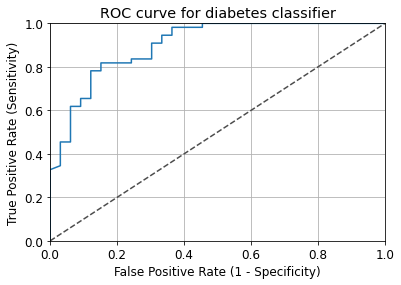

In [ ]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_quant)

fig, ax = plt.subplots()
ax.plot(fpr, tpr)
ax.plot([0, 1], [0, 1], transform=ax.transAxes, ls="--", c=".3")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve for diabetes classifier')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

Another common metric is the **Area Under the Curve**, or **AUC**. This is a convenient way to capture the performance of a model in a single number, although it's not without certain issues. As a rule of thumb, an AUC can be classed as follows,

- 0.90 - 1.00 = excellent
- 0.80 - 0.90 = good
- 0.70 - 0.80 = fair
- 0.60 - 0.70 = poor
- 0.50 - 0.60 = fail

In [ ]:
auc(fpr, tpr)

0.9022038567493113

OK, so it's working well.

<a id='section4'></a>

# The Explanation of The Model

**Permutation importance** is the first tool for understanding a machine-learning model, and involves shuffling individual variables in the validation data (after a model has been fit), and seeing the effect on accuracy.

In [ ]:
perm = PermutationImportance(model, random_state=1).fit(X_test, y_test)
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0636 ± 0.0396,thal
0.0364 ± 0.0265,ca
0.0364 ± 0.0485,cp
0.0295 ± 0.0652,oldpeak
0.0205 ± 0.0302,exang
0.0114 ± 0.0144,restecg
0.0045 ± 0.0308,trestbps
0.0000 ± 0.0249,slope
0 ± 0.0000,chol
-0.0023 ± 0.0091,fbs


Let's see what the SHAP values tell us. These work by showing the influence of the values of every variable in a single row, compared to their baseline values

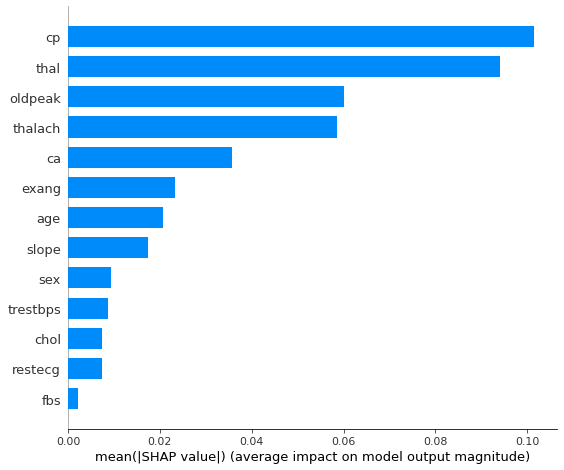

In [ ]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_test)

shap.summary_plot(shap_values[1], X_test, plot_type="bar")

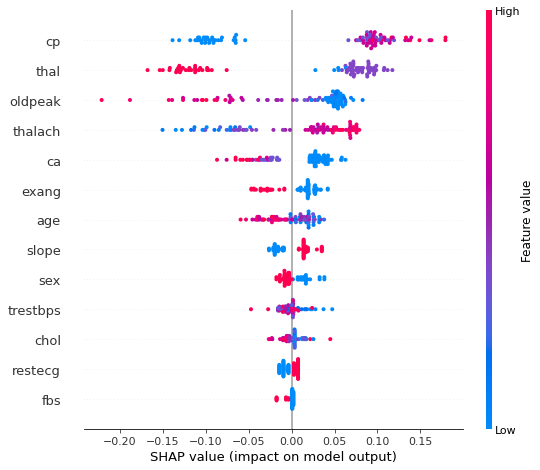

In [ ]:
shap.summary_plot(shap_values[1], X_test)

Next, let's pick out individual patients and see how the different variables are affecting their outcomes,

In [ ]:
def heart_disease_risk_factors(model, patient):

    explainer = shap.TreeExplainer(model)
    shap_values = explainer.shap_values(patient)
    shap.initjs()
    return shap.force_plot(explainer.expected_value[1], shap_values[1], patient)

In [ ]:
data_for_prediction = X_test.iloc[1,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [ ]:
data_for_prediction = X_test.iloc[3,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

In [ ]:
data_for_prediction = X_test.iloc[21,:].astype(float)
heart_disease_risk_factors(model, data_for_prediction)

The final plot shows the predictions and influencing factors for many patients (this plot shows 50 patients). It's also interactive. Hover over to see *why* each person ended up either red (prediction of disease) or blue (prediction of no disease),

In [ ]:
shap_values = explainer.shap_values(X_train.iloc[:50])
shap.force_plot(explainer.expected_value[1], shap_values[1], X_test.iloc[:50])

<a id='section5'></a>